In [1]:
import os
import pandas as pd
pd.set_option("display.max_columns", None)
# folder containing CSV files
folder_path = "./data"

# get all CSV files and sort by name
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".csv")])

# list to hold each dataframe
dfs = []

# loop through files
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    try:
        # read CSV
        df = pd.read_csv(file_path)
        
        # print row count
        print(f"{file}: {len(df)} rows")
        
        # add filename as a column (optional, useful for tracking source)
        df["source_file"] = file
        
        # append to list
        dfs.append(df)
    except Exception as e:
        print(f"Could not read {file}: {e}")

# concatenate all DataFrames into one
if dfs:
    final_df = pd.concat(dfs, ignore_index=True)
    print(f"\nFinal combined dataframe shape: {final_df.shape}")
else:
    final_df = pd.DataFrame()
    print("\nNo CSV files were loaded.")


reviews_ChIJ--Sssh3fDkgRwG7_On3ilEg.csv: 205 rows
reviews_ChIJ07HOMggd5kcRoN6H2QFsne0.csv: 331 rows
reviews_ChIJ0XAmySmPi0cRyELFsY7MRAc.csv: 205 rows
reviews_ChIJ0a43QYmxrhIRzWwONqoORps.csv: 120 rows
reviews_ChIJ0aHr-ujDw0cRdZoYA5oxVlw.csv: 40 rows
reviews_ChIJ0d_9F-155kcRPJiAOPdx7XI.csv: 151 rows
reviews_ChIJ10SpyuEN5EcRwnHhwyqOeKQ.csv: 179 rows
reviews_ChIJ1dOHOuN16UcRQCYMbO4Um6U.csv: 212 rows
reviews_ChIJ1zd5b-Vv5kcRfogYfJhIebk.csv: 154 rows
reviews_ChIJ2UUE5fw1sRIRbtsF56o6Kxg.csv: 73 rows
reviews_ChIJ2XE4rw47w0cRc1yI0tZqZ0w.csv: 21 rows
reviews_ChIJ2XxXpUih6EcRNJ06cCK3HX0.csv: 220 rows
reviews_ChIJ2aZdC1DtBUgR-l1eijBrYgE.csv: 121 rows
reviews_ChIJ2c4_ShFz5kcRmcRLP8A69Ps.csv: 268 rows
reviews_ChIJ3XvhCfcVUQ0Rxl3K8_yFZ34.csv: 106 rows
reviews_ChIJ4YzlYXFH4UcRpB5ooR958Tw.csv: 482 rows
reviews_ChIJ5615WXDZVA0Rd83V5S-XeYE.csv: 222 rows
reviews_ChIJ5Xots2PTzRIRxw4Y2hyf2xg.csv: 239 rows
reviews_ChIJ645BxkGZ7kcRc-0hlSVSfbM.csv: 239 rows
reviews_ChIJ653xXjrVwkcRX8LAKTjEg-4.csv: 267 rows
rev

In [4]:
final_df["google_place_id"] = final_df["source_file"].str.replace(r"^reviews_", "", regex=True).str.replace(r".csv", "", regex=True)

In [5]:
final_df.google_place_id.nunique()

157

In [49]:
# lazeo_total = pd.read_csv('lazeo_reviews.csv')
# lazeo_total_v2 = lazeo_total[['centre_name', 'centre_url', 'google_place_id', 'centre_rating',
#        'centre_total_ratings']].drop_duplicates()
# lazeo_total_v3 = lazeo_total_v2.merge(final_df, on='google_place_id')

In [6]:
final_df[['title','location','city','totalScore', 'google_place_id','reviewsCount','name', 'reviewerNumberOfReviews','isLocalGuide','textTranslated','publishAt', 'publishedAtDate','visitedIn','likesCount','stars']].to_csv('all_lazeo_reviews.csv',index=0)

In [7]:
final_df[['title','location','city','totalScore', 'google_place_id','reviewsCount']].to_csv('all_lazeo_storelevel_reviews.csv',index=0)

In [13]:
final_df_store = final_df[['title','location','city','totalScore', 'google_place_id','reviewsCount']].drop_duplicates()

In [32]:
# Group by title and pivot stars into columns
pivot_table = final_df.groupby(["title", "stars"]).size().unstack(fill_value=0)

pivot_table = pivot_table.rename(columns={i: f"{i}_star" for i in pivot_table.columns})

# Reset index so title is a column
pivot_table = pivot_table.reset_index()


In [33]:
pivot_table

stars,title,1_star,2_star,3_star,4_star,5_star
0,Lazeo,15,1,3,14,301
1,Lazeo Agen,4,0,2,3,153
2,Lazeo Aix en Provence,16,7,0,10,251
3,Lazeo Amiens,7,3,6,15,428
4,Lazeo Angers,10,2,1,4,184
...,...,...,...,...,...,...
152,Lazeo Valence,4,0,0,1,70
153,Lazeo Vannes,0,0,0,2,123
154,Lazeo Versailles,21,5,3,8,199
155,Lazeo Villeurbanne,12,2,0,5,154


In [14]:
final_df['textTranslated'][0]

'I started my sessions at Lazeo Massy and then moved to Rennes, so I continued my sessions at this center. Honestly, the staff is very friendly, especially Ines, who is incredibly kind <3.\nI highly recommend it.'

In [15]:
import pandas as pd
import json

# Example dataframe

data1 = pd.read_csv('checkpoint91.csv')
data2 = pd.read_csv('checkpoint45.csv')
data3 = pd.read_csv('checkpoint137.csv')
data4 = pd.read_csv('all_lazeo_reviews_with_raw.csv')


data = pd.concat([data1,data2,data3,data4])
df = data[data['raw_output'].isna() ==False][['title','raw_output']].drop_duplicates()

# Function to parse the JSON column
def parse_review_json(js):
    review = json.loads(js)

    # Basic stats
    total_reviews = review.get("total_reviews", None)
    counts = review.get("counts", {})
    positive_count = counts.get("positive", 0)
    negative_count = counts.get("negative", 0)
    neutral_count = counts.get("neutral", 0)

    # Flatten fields
    positive_points = "; ".join([f"{list(item.keys())[0]} ({list(item.values())[0]})"
                                 for item in review.get("positive_points", [])])

    negative_points = "; ".join([f"{k} ({v}) -> {item.get('suggestion','')}"
                                 for item in review.get("negative_points", [])
                                 for k,v in item.items() if k != "suggestion"])

    staff_liked = "; ".join([f"{k} ({v})" for k,v in review.get("staff_liked", {}).items()])
    staff_disliked = "; ".join([f"{k} ({v})" for k,v in review.get("staff_disliked", {}).items()])
    recommendation = review.get("recommendations_summary", "")

    return pd.Series([
        total_reviews, positive_count, negative_count, neutral_count,
        positive_points, negative_points, staff_liked, staff_disliked, recommendation
    ], index=[
        "total_reviews", "positive_count", "negative_count", "neutral_count",
        "positive_points", "negative_points", "staff_liked", "staff_disliked", "recommendation"
    ])

# Apply to dataframe
parsed = df["raw_output"].apply(parse_review_json)
final_df_store2 = pd.concat([df.drop(columns=["raw_output"]), parsed], axis=1)

# Show result
#final_df_store2.to_csv('store_level_stats.csv',index=0)
final_df_store2.head()


,title,total_reviews,positive_count,negative_count,neutral_count,positive_points,negative_points,staff_liked,staff_disliked,recommendation
8532,Lazeo Garches,20,17,1,2,friendly staff (11); professionalism (11); cle...,late appointment (1) -> improve punctuality; p...,Sherine (6); Jessica (1),,Lazeo Garches is highly recommended for its fr...
8559,Lazeo Beauvais,110,106,1,3,friendly staff (47); professional staff (42); ...,location (1) -> move/relocate; painful (2) -> ...,Sonia (22); Karene (20); Karen (7); Karine (6)...,,Lazeo Beauvais receives overwhelmingly positiv...
8687,Lazeo Nancy,94,65,15,14,friendly staff (38); professional staff (32); ...,ineffective results (7) -> review protocols; b...,Mélanie (1); Asma (3); Esther (1); Orianne/Ori...,None (0),Most clients highly praise Lazeo Nancy for its...
8771,Lazeo Clermont-Ferrand,86,62,13,11,friendly staff (38); clean premises (16); effe...,ineffective results (7) -> treatment evaluatio...,Emilie (17); Célia (8); Lisa (5); Laura (5); A...,Celia (1); unnamed technician (3),Most customers recommend Lazeo Clermont-Ferran...
8863,Lazeo Nice,164,128,22,14,friendly staff (67); professionalism (58); cle...,ineffective results (13) -> improve laser sett...,Acia (22); Lilou (15); Leelou (15); Cassandre ...,Émilie (1),Most clients recommend Lazeo Nice for its frie...


In [16]:
final_df_store

,title,location,city,totalScore,google_place_id,reviewsCount
0,Lazeo Rennes 2,"{'lat': 48.1065589, 'lng': -1.6728613}",Rennes,4.8,ChIJ--Sssh3fDkgRwG7_On3ilEg,205
205,Lazeo Val D'Europe,"{'lat': 48.8588026, 'lng': 2.7741199}",Chessy,4.6,ChIJ07HOMggd5kcRoN6H2QFsne0,331
536,Lazeo Annecy,"{'lat': 45.9005465, 'lng': 6.1256414}",Annecy,4.1,ChIJ0XAmySmPi0cRyELFsY7MRAc,208
741,Lazeo Colomiers,"{'lat': 43.6106157, 'lng': 1.3332405}",Colomiers,4.8,ChIJ0a43QYmxrhIRzWwONqoORps,120
861,Lazeo Docks,"{'lat': 50.8793322, 'lng': 4.3730967}",Brussels,4.8,ChIJ0aHr-ujDw0cRdZoYA5oxVlw,40
...,...,...,...,...,...,...
28255,Lazeo Mantes-la-jolie,"{'lat': 48.9901097, 'lng': 1.7159727}",Mantes-la-Jolie,4.9,ChIJvTgVMwi_5kcRrr5hR7LPABw,216
28471,Lazeo Rezé,"{'lat': 47.1885763, 'lng': -1.5514626}",Rezé,4.8,ChIJwZkoAv7pBUgR7XKCZQmG_oc,123
28594,Lazeo Beziers,"{'lat': 43.3371192, 'lng': 3.2240744}",Béziers,4.9,ChIJweEmWWcPsRIR7elNmM4fw1M,168
28762,Lazeo Limoges,"{'lat': 45.8309687, 'lng': 1.2598581}",Limoges,4.9,ChIJx04WXU81-UcRxR1SEFblAdU,128


In [17]:
final_df_store2

,title,total_reviews,positive_count,negative_count,neutral_count,positive_points,negative_points,staff_liked,staff_disliked,recommendation
8532,Lazeo Garches,20,17,1,2,friendly staff (11); professionalism (11); cle...,late appointment (1) -> improve punctuality; p...,Sherine (6); Jessica (1),,Lazeo Garches is highly recommended for its fr...
8559,Lazeo Beauvais,110,106,1,3,friendly staff (47); professional staff (42); ...,location (1) -> move/relocate; painful (2) -> ...,Sonia (22); Karene (20); Karen (7); Karine (6)...,,Lazeo Beauvais receives overwhelmingly positiv...
8687,Lazeo Nancy,94,65,15,14,friendly staff (38); professional staff (32); ...,ineffective results (7) -> review protocols; b...,Mélanie (1); Asma (3); Esther (1); Orianne/Ori...,None (0),Most clients highly praise Lazeo Nancy for its...
8771,Lazeo Clermont-Ferrand,86,62,13,11,friendly staff (38); clean premises (16); effe...,ineffective results (7) -> treatment evaluatio...,Emilie (17); Célia (8); Lisa (5); Laura (5); A...,Celia (1); unnamed technician (3),Most customers recommend Lazeo Clermont-Ferran...
8863,Lazeo Nice,164,128,22,14,friendly staff (67); professionalism (58); cle...,ineffective results (13) -> improve laser sett...,Acia (22); Lilou (15); Leelou (15); Cassandre ...,Émilie (1),Most clients recommend Lazeo Nice for its frie...
...,...,...,...,...,...,...,...,...,...,...
28255,Lazeo Mantes-la-jolie,151,148,1,2,warm welcome (78); professional staff (77); ef...,booking communication (1) -> Improve schedulin...,Alice (18); Anaïs (13); Marine (9); Lynda (15)...,,Nearly all reviewers recommend Lazeo Mantes-la...
28471,Lazeo Rezé,109,88,12,9,friendly staff (44); professionalism (35); eff...,ineffective electrolysis (3) -> clarify expect...,Delphine (17); Nadia (4); Solene (3); Chloé (1...,manager (2),The majority of reviewers highly recommend Laz...
28594,Lazeo Beziers,132,116,10,6,friendly staff (62); professionalism (56); eff...,lack of information (3) -> better communicatio...,Samantha (15); Ornella (8); Laurine (6); Carol...,,Lazeo Béziers receives overwhelmingly positive...
28762,Lazeo Limoges,109,97,5,7,friendly staff (71); professionalism (54); eff...,regrowth after laser (2) -> improve lasting re...,Jade (15); Lise (5); Tatiana (2); Émilie (1); ...,master (1),The vast majority of reviewers express high sa...


In [34]:
final_df_store3 = final_df_store.merge(pivot_table,on='title').merge(final_df_store2, on = 'title')

In [38]:
final_df_store4 = final_df_store3.drop(['positive_count','negative_count','neutral_count'], axis = 1)

In [51]:
import ast  # to safely evaluate dict-like strings

final_df_store4["location"] = final_df_store4["location"].apply(ast.literal_eval)


final_df_store4 = final_df_store4.join(pd.json_normalize(final_df_store4['location']))

# Drop original dict column if not needed
#final_df_store4 = final_df_store4.drop(columns=['location'])

In [52]:
final_df_store4['location']

0      {'lat': 48.1065589, 'lng': -1.6728613}
1       {'lat': 48.8588026, 'lng': 2.7741199}
2       {'lat': 45.9005465, 'lng': 6.1256414}
3       {'lat': 43.6106157, 'lng': 1.3332405}
4       {'lat': 50.8793322, 'lng': 4.3730967}
                        ...                  
152     {'lat': 48.9901097, 'lng': 1.7159727}
153    {'lat': 47.1885763, 'lng': -1.5514626}
154     {'lat': 43.3371192, 'lng': 3.2240744}
155     {'lat': 45.8309687, 'lng': 1.2598581}
156     {'lat': 48.8896097, 'lng': 2.2419954}
Name: location, Length: 157, dtype: object

In [53]:
pd.json_normalize(final_df_store4['location'])

,lat,lng
0,48.106559,-1.672861
1,48.858803,2.774120
2,45.900546,6.125641
3,43.610616,1.333241
4,50.879332,4.373097
...,...,...
152,48.990110,1.715973
153,47.188576,-1.551463
154,43.337119,3.224074
155,45.830969,1.259858


In [55]:
final_df_store4.head()

,title,location,city,totalScore,google_place_id,reviewsCount,1_star,2_star,3_star,4_star,5_star,total_reviews,positive_points,negative_points,staff_liked,staff_disliked,recommendation,lat,lng
0,Lazeo Rennes 2,"{'lat': 48.1065589, 'lng': -1.6728613}",Rennes,4.8,ChIJ--Sssh3fDkgRwG7_On3ilEg,205,5,1,0,8,191,140,friendly staff (57); professionalism (44); eff...,regrowth/ineffective results (5) -> machine ca...,Inès (31); Emilie (14); Marine (12); Anaïs (10...,none (0),The vast majority of clients highly recommend ...,48.106559,-1.672861
1,Lazeo Val D'Europe,"{'lat': 48.8588026, 'lng': 2.7741199}",Chessy,4.6,ChIJ07HOMggd5kcRoN6H2QFsne0,331,27,6,4,6,288,119,professional staff (62); friendly/warm welcome...,price changes (7) -> transparent pricing; team...,Kelly (28); Béatrice (17); Anaïs (7); Roxane/R...,unnamed staff (9); manager (3),Most reviewers recommend Lazeo Val d'Europe fo...,48.858803,2.774120
2,Lazeo Annecy,"{'lat': 45.9005465, 'lng': 6.1256414}",Annecy,4.1,ChIJ0XAmySmPi0cRyELFsY7MRAc,208,40,3,1,5,156,100,friendly staff (22); professional team (20); c...,ineffective results (13) -> improve treatment ...,Solene (6); Lauryn (4); Faustine (6); Carla (2...,Solene (4); Marine (2); manager (7); unidentif...,Lazeo Annecy receives consistent praise for it...,45.900546,6.125641
3,Lazeo Colomiers,"{'lat': 43.6106157, 'lng': 1.3332405}",Colomiers,4.8,ChIJ0a43QYmxrhIRzWwONqoORps,120,5,0,0,4,111,109,friendly staff (52); welcoming atmosphere (46)...,booking issues (4) -> improve scheduling; staf...,Camille (12); Morgane (6); Mélanie (7); Julie ...,Carolina (1); manager (2); secretary (2),Lazeo Colomiers receives high praise for its w...,43.610616,1.333241
4,Lazeo Docks,"{'lat': 50.8793322, 'lng': 4.3730967}",Brussels,4.8,ChIJ0aHr-ujDw0cRdZoYA5oxVlw,40,1,1,0,2,36,33,cleanliness (10); professional staff (19); att...,staff attitude (1) -> Improve staff training; ...,Laurence (12); Anastasia (4); Dr. Amzile (1); ...,,Lazeo Docks receives overwhelmingly positive f...,50.879332,4.373097


In [56]:
final_df_store4.to_csv('store_level_overall_insights.csv',index=0)

In [57]:
final_df_store4.dtypes

title               object
location            object
city                object
totalScore         float64
google_place_id     object
reviewsCount         int64
1_star               int64
2_star               int64
3_star               int64
4_star               int64
5_star               int64
total_reviews        int64
positive_points     object
negative_points     object
staff_liked         object
staff_disliked      object
recommendation      object
lat                float64
lng                float64
dtype: object

## few tests

In [120]:
# Staff disliked
staff_disliked_records = []
for _, row in final_df_store4.iterrows():
    store = row["title"]
    for s in str(row.get("staff_disliked", "")).split(";"):
        s = s.strip()
        if s:
            match = re.match(r"^(.*?)\s*\((\d+)\)$", s)
            if match:
                name = match.group(1).strip()
                count = int(match.group(2))
            else:
                name = s
                count = 1
            staff_disliked_records.append((name, store, count))

df_disliked = (
    pd.DataFrame(staff_disliked_records, columns=["Staff", "Store", "Mentions"])
    .groupby(["Staff", "Store"], as_index=False)["Mentions"].sum()
    .sort_values(["Mentions"], ascending=False)
)


In [121]:
df_disliked

,Staff,Store,Mentions
131,no specific names,Lazeo Lyon Part-Dieu,16
191,unspecified practitioners/managers,Lazeo Médical Boulogne,10
182,unnamed staff,Lazeo Val D'Europe,9
132,no specific names,Lazeo Paris 12e - Daumesnil,9
180,unnamed receptionist/technician,Lazeo Asnières,7
...,...,...,...
173,unnamed manager,Lazeo Valence,1
196,Émilie,Lazeo Nice,1
63,None,Lazeo Nancy,0
135,none,Lazeo Menton,0


In [130]:
import re

# Staff disliked
staff_disliked_records = []
skip_keywords = ["no specific", "unnamed", "unspecified", "none"]  # ✅ keywords to skip (case-insensitive)

for _, row in final_df_store4.iterrows():
    store = row["title"]
    for s in str(row.get("staff_disliked", "")).split(";"):
        s = s.strip()
        if not s:
            continue
        match = re.match(r"^(.*?)\s*\((\d+)\)$", s)
        if match:
            name = match.group(1).strip()
            count = int(match.group(2))
        else:
            name = s
            count = 1

        # ✅ skip if name contains any unwanted keyword (case-insensitive)
        if any(kw in name.lower() for kw in skip_keywords):
            continue

        staff_disliked_records.append((name, store, count))

df_disliked = (
    pd.DataFrame(staff_disliked_records, columns=["Staff", "Store", "Mentions"])
    .groupby(["Staff", "Store"], as_index=False)["Mentions"].sum()
    .sort_values(["Mentions"], ascending=False)
)


In [131]:
df_disliked

,Staff,Store,Mentions
90,manager,Lazeo Annecy,7
68,Receptionist,Lazeo Paris 8e - St-Lazare,6
92,manager,Lazeo Caen,6
86,doctor (not named),Lazeo Troyes,6
123,unidentified 'doctor',Lazeo Paris 13e,6
...,...,...,...
122,trainee,Lazeo Paris 16e,1
134,unknown doctor,Lazeo Paris 17e,1
135,unknown practitioner (painful hydrafacial),Lazeo Arras,1
136,young woman at reception,Lazeo Bezannes,1


In [135]:
    # Build positive & negative counters with counts
positives_counter = Counter()
negatives_counter = Counter()

_count_re = re.compile(r'^(.*?)\s*\((\d+)\)\s*$')
for pts in final_df_store4["negative_points"].dropna():
    for p in pts.split(";"):
        s = p.strip()
        if not s:
            continue
        left = s.split("->")[0].strip()
        m = _count_re.match(left)
        if m:
            name = m.group(1).strip()
            cnt = int(m.group(2))
        else:
            name = left.split("(")[0].strip()
            cnt = 1
        if not name:
            continue
        if name.lower() in to_remove:
            continue
        negatives_counter[name] += cnt

most_common_pos = ", ".join([f"{p} ({c})" for p, c in positives_counter.most_common(5)])
most_common_neg = ", ".join([f"{n} ({c})" for n, c in negatives_counter.most_common(5)])


In [142]:
negatives_counter

Counter({'ineffective results': 187,
         'lack of follow-up': 116,
         'appointment issues': 105,
         'appointment cancellations': 78,
         'poor communication': 74,
         'poor results': 72,
         'lack of professionalism': 63,
         'rushed sessions': 55,
         'no/poor results': 53,
         'staff turnover': 51,
         'poor follow-up': 51,
         'inconsistent results': 38,
         'disappointing results': 36,
         'high staff turnover': 35,
         'high price': 32,
         'poor reception': 31,
         'unfriendly staff': 28,
         'practitioner changes': 28,
         'no results': 26,
         'refund issues': 25,
         'unprofessional staff': 25,
         'poor customer service': 23,
         'cold/unfriendly reception': 23,
         'painful sessions': 23,
         'lack of results': 23,
         'communication issues': 22,
         'unfriendly reception': 22,
         'poor results/ineffectiveness': 21,
         'ineffective t

In [148]:
import plotly.express as px
from streamlit_plotly_events import plotly_events
def load_reviews():
    return pd.read_csv("all_lazeo_reviews.csv")

reviews_df = load_reviews()


st.markdown(f"### {row['title']} ({row.get('city','')})")
st.markdown(f"**Recommendation:** {row.get('recommendation','')}")

st.markdown(
    f"<div style='font-size:22px; font-weight:600; margin:10px 0;'>"
    f"⭐ Rating: <span style='color:#2e7d32;'>{row.get('totalScore','-')}</span> "
    f"&nbsp;&nbsp;|&nbsp;&nbsp; "
    f"📝 Reviews: <span style='color:#1565c0;'>{row.get('reviewsCount','-')}</span>"
    f"</div>",
    unsafe_allow_html=True,
)

# ✅ Build star distribution dynamically from reviews_df
store_reviews = reviews_df[reviews_df["title"] == row["title"]]
star_counts = store_reviews["stars"].value_counts().reindex([5, 4, 3, 2, 1], fill_value=0)

star_data = pd.DataFrame({
    "Stars": [f"{s}★" for s in star_counts.index],
    "Count": star_counts.values
})

fig = px.bar(
    star_data, x="Stars", y="Count", text="Count", color="Stars",
    color_discrete_map={
        "5★": "green",
        "4★": "lightgreen",
        "3★": "orange",
        "2★": "red",
        "1★": "darkred"
    }
)
fig.update_traces(textposition="outside")
fig.update_layout(showlegend=False, height=400)



# ✅ Interactive chart (clickable bars)
selected_bar = plotly_events(
    fig,
    click_event=True,
    select_event=False,
    override_height=400,
    override_width="100%",
    key=f"star_click_{row['title']}"
)

# ✅ If user clicks a bar → show reviews
if selected_bar:
    clicked_star = selected_bar[0]["x"]  # "1★", "2★", etc.
    star_num = int(clicked_star.replace("★", ""))

    st.subheader(f"{star_num}★ Reviews for {row['title']}")

    # Filter reviews dataset
    star_reviews = store_reviews[store_reviews["stars"] == star_num].copy()

    if star_reviews.empty:
        st.info(f"No {star_num}★ reviews found for this store.")
    else:
        # Sort newest → oldest
        star_reviews = star_reviews.sort_values(by="publishedAtDate", ascending=False)

        # Slider for how many to display
        max_to_show = st.slider(
            "Number of reviews to display",
            1,
            min(50, len(star_reviews)),
            5,
            key=f"slider_{row['title']}_{star_num}"
        )

        for _, r in star_reviews.head(max_to_show).iterrows():
            st.markdown(
                f"<div style='background:#f9f9f9; padding:10px; margin:5px; border-radius:8px;'>"
                f"<b>{r['publishedAtDate']}</b><br>{r['textTranslated']}"
                f"</div>",
                unsafe_allow_html=True,
            )


2025-09-16 21:52:40.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 21:52:40.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

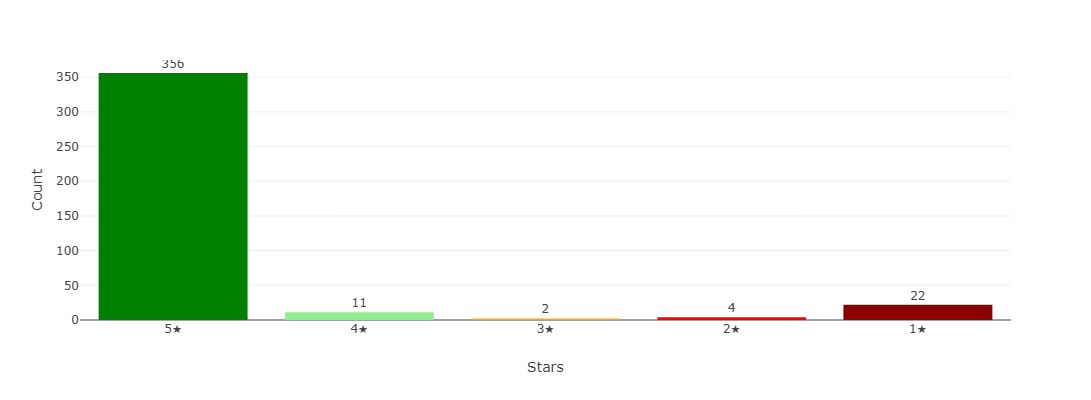

In [149]:
fig.update_traces(textposition="outside")
fig.update_layout(showlegend=False, height=400)
